In [42]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import string
import nltk
from nltk.corpus import stopwords
import re
from collections import Counter
import stanza
from spellchecker import SpellChecker
from nltk.corpus import words
import zemberek
from zemberek.morphology import TurkishMorphology
from zemberek.tokenization import TurkishTokenizer
from zemberek.normalization import TurkishSpellChecker
from zemberek.normalization import  TurkishSentenceNormalizer
import jpype
import jpype.imports
from jpype.types import JString

# READ DATA

In [49]:
df = pd.read_csv('tweets.csv')
df.head()

,timestamp,username,handle,tweet_date,content
0,2024-11-03 19:38:25,Orhan Şevik,orhan_sevik,"Feb 8, 2023",@haluklevent\n @OguzhanUgur\n hepinizden Alla...
1,2024-11-03 19:38:25,nursena,nurssxx_,"Feb 8, 2023",Allahım nolur sen onlara dayanma gücü ver #deprem
2,2024-11-03 19:38:25,Elif ŞEKER,55ellllllif,"Feb 8, 2023",Replying to \n@haluklevent\n @danlabilic\n and...
3,2024-11-03 19:38:25,Yusuf,yusufaltuns,"Feb 8, 2023",Tuğba södekoğlu kovulsun \n@showtv\n #deprem
4,2024-11-03 19:38:25,𝐎̈𝐳𝐠𝐮̈𝐫 𝐑𝐚𝐧,dryghtn2,"Feb 8, 2023",ARKADAŞIMIZA ULAŞAMIYORUZ\nKahramanmaraş Elbis...


# CHECK DATA

In [50]:
def checkData(data):
    print("****************SHAPE****************")
    print(data.shape)
    print("****************COLUMNS****************")
    print(data.columns)
    print("****************DTYPES****************")
    print(data.dtypes)    
    print("****************HEAD****************")
    print(data.head())
    print("****************Tail****************")
    print(data.tail())
    print("****************NA****************")
    print(data.isnull().sum())
    print("****************INFO****************")
    print(data.info())

checkData(df)

****************SHAPE****************
(2861, 5)
****************COLUMNS****************
Index(['timestamp', 'username', 'handle', 'tweet_date', 'content'], dtype='object')
****************DTYPES****************
timestamp     object
username      object
handle        object
tweet_date    object
content       object
dtype: object
****************HEAD****************
             timestamp     username       handle   tweet_date  \
0  2024-11-03 19:38:25  Orhan Şevik  orhan_sevik  Feb 8, 2023   
1  2024-11-03 19:38:25      nursena     nurssxx_  Feb 8, 2023   
2  2024-11-03 19:38:25   Elif ŞEKER  55ellllllif  Feb 8, 2023   
3  2024-11-03 19:38:25        Yusuf  yusufaltuns  Feb 8, 2023   
4  2024-11-03 19:38:25  𝐎̈𝐳𝐠𝐮̈𝐫 𝐑𝐚𝐧     dryghtn2  Feb 8, 2023   

                                             content  
0  @haluklevent\n @OguzhanUgur\n  hepinizden Alla...  
1  Allahım nolur sen onlara dayanma gücü ver #deprem  
2  Replying to \n@haluklevent\n @danlabilic\n and...  
3       Tuğba södekoğl

# Drop Duplicate & Nan

In [51]:
df = df.drop_duplicates(subset=["content"], keep="first").reset_index(drop=True)
df = df.dropna(subset=["content"]).reset_index(drop=True)
checkData(df)

****************SHAPE****************
(2562, 5)
****************COLUMNS****************
Index(['timestamp', 'username', 'handle', 'tweet_date', 'content'], dtype='object')
****************DTYPES****************
timestamp     object
username      object
handle        object
tweet_date    object
content       object
dtype: object
****************HEAD****************
             timestamp     username       handle   tweet_date  \
0  2024-11-03 19:38:25  Orhan Şevik  orhan_sevik  Feb 8, 2023   
1  2024-11-03 19:38:25      nursena     nurssxx_  Feb 8, 2023   
2  2024-11-03 19:38:25   Elif ŞEKER  55ellllllif  Feb 8, 2023   
3  2024-11-03 19:38:25        Yusuf  yusufaltuns  Feb 8, 2023   
4  2024-11-03 19:38:25  𝐎̈𝐳𝐠𝐮̈𝐫 𝐑𝐚𝐧     dryghtn2  Feb 8, 2023   

                                             content  
0  @haluklevent\n @OguzhanUgur\n  hepinizden Alla...  
1  Allahım nolur sen onlara dayanma gücü ver #deprem  
2  Replying to \n@haluklevent\n @danlabilic\n and...  
3       Tuğba södekoğl

# Tweets Lower And Conver Str

In [52]:
df['content'] = df['content'].astype(str)
df['content'] = df['content'].str.lower()

# Count By Tweet Date

In [53]:
tweet_counts = df.groupby('tweet_date')['content'].count().sort_values(ascending=False)
print("=== Tweet Counts by Date ===")
print(tweet_counts)

=== Tweet Counts by Date ===
tweet_date
Feb 10, 2023    1030
Feb 7, 2023      559
Feb 8, 2023      484
Feb 9, 2023      440
Feb 6, 2023       49
Name: content, dtype: int64


# Hastags

In [54]:
hashtag_counts = df['content'].str.findall(r'#\w+').explode().value_counts()
print("=== Hashtag Counts ===")
print(hashtag_counts)

=== Hashtag Counts ===
content
#deprem                 2503
#hatay                   399
#hatayyardimbekliyor     194
#depremsondakika         185
#afad                    164
                        ... 
#demiryolu                 1
#fay                       1
#proton                    1
#zülfükar                  1
#gocukaltindayim           1
Name: count, Length: 816, dtype: int64


# Word Cloud

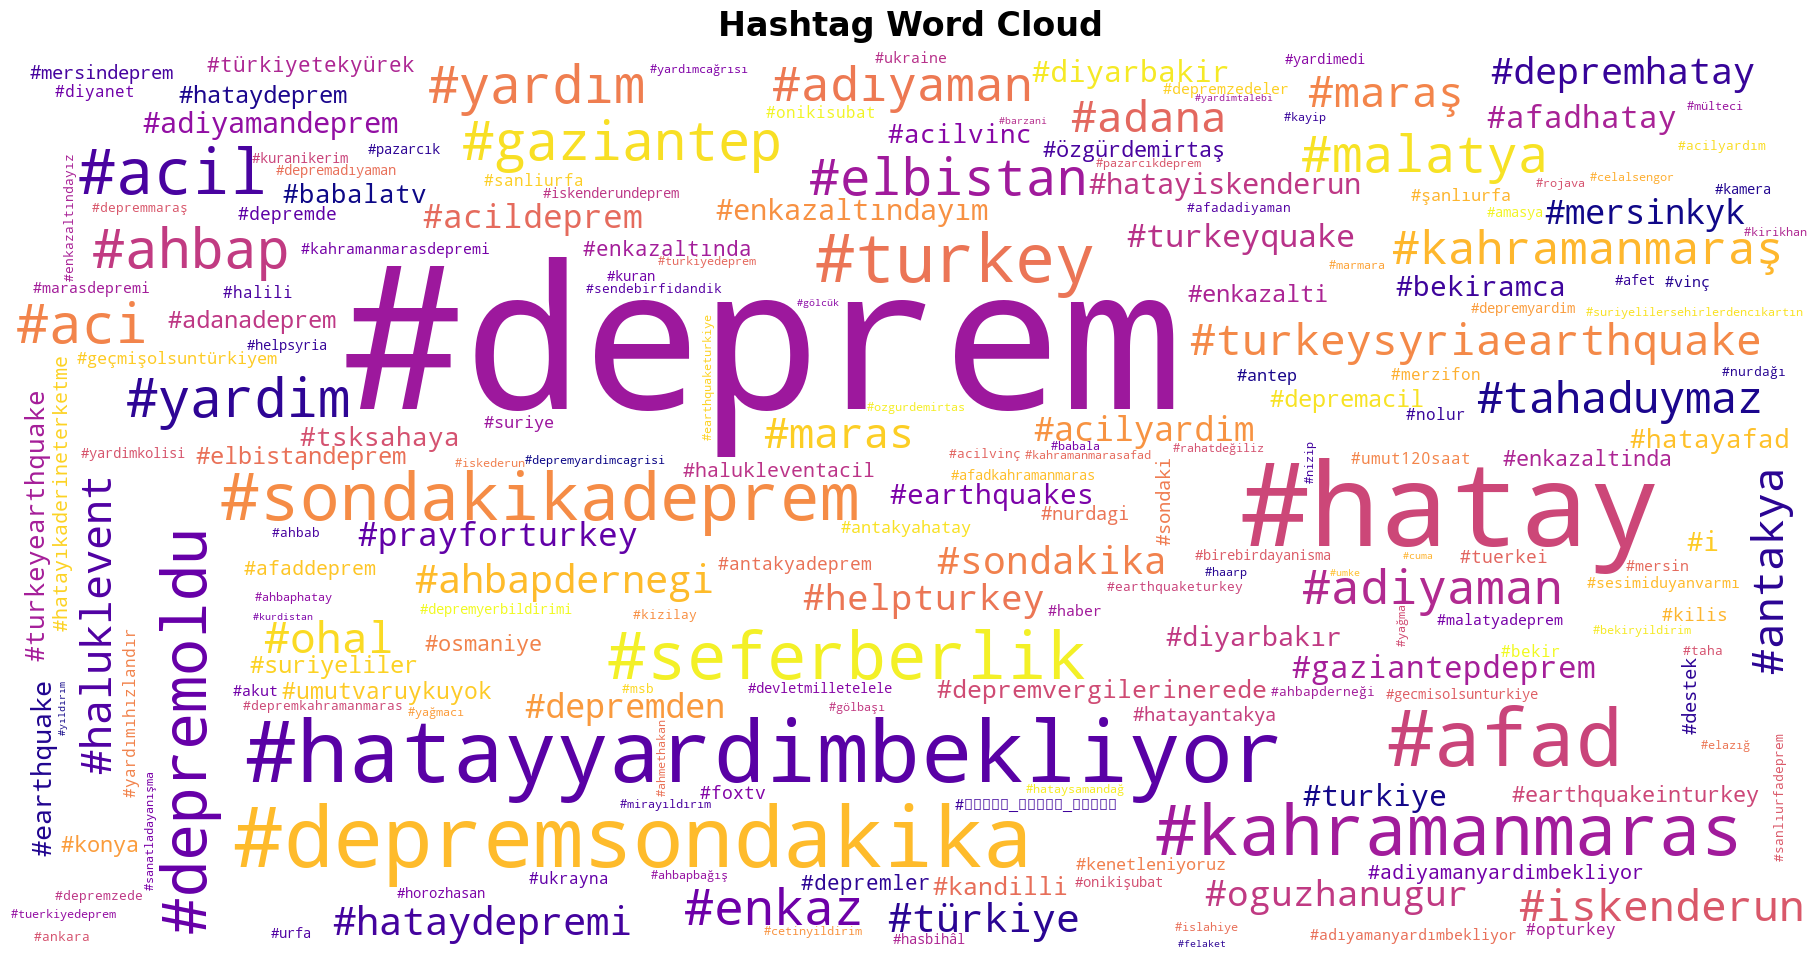

In [55]:
hashtag_dict = hashtag_counts.to_dict()
wordcloud = WordCloud(
    width=1800,
    height=900,
    background_color='white',       
    min_font_size=10,
    max_font_size=200,
    colormap='plasma',              
    contour_color='steelblue',       
    contour_width=1.5               
).generate_from_frequencies(hashtag_dict)
plt.figure(figsize=(18, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Hashtag Word Cloud', fontsize=24, fontweight='bold', pad=10)
plt.tight_layout(pad=0)
plt.show()

# Remove @ mentions and hyperlinks

In [56]:
def remove_mentions(text):
    return re.sub(r'@[A-Za-z0-9]+', '', text)

def remove_urls(text):
    text = re.sub(r'http\S+', '', text)  
    text = re.sub(r'www\S+', '', text)   
    return text

df['content_ment_link'] = df['content'].apply(lambda x: remove_mentions(x))
df['content_ment_link'] = df['content_ment_link'].apply(lambda x: remove_urls(x))
df.head()

,timestamp,username,handle,tweet_date,content,content_ment_link
0,2024-11-03 19:38:25,Orhan Şevik,orhan_sevik,"Feb 8, 2023",@haluklevent\n @oguzhanugur\n hepinizden alla...,\n \n hepinizden allah razı olsun iyiki varsı...
1,2024-11-03 19:38:25,nursena,nurssxx_,"Feb 8, 2023",allahım nolur sen onlara dayanma gücü ver #deprem,allahım nolur sen onlara dayanma gücü ver #deprem
2,2024-11-03 19:38:25,Elif ŞEKER,55ellllllif,"Feb 8, 2023",replying to \n@haluklevent\n @danlabilic\n and...,replying to \n\n \n and \n_harun\nadıyamanda a...
3,2024-11-03 19:38:25,Yusuf,yusufaltuns,"Feb 8, 2023",tuğba södekoğlu kovulsun \n@showtv\n #deprem,tuğba södekoğlu kovulsun \n\n #deprem
4,2024-11-03 19:38:25,𝐎̈𝐳𝐠𝐮̈𝐫 𝐑𝐚𝐧,dryghtn2,"Feb 8, 2023",arkadaşimiza ulaşamiyoruz\nkahramanmaraş elbis...,arkadaşimiza ulaşamiyoruz\nkahramanmaraş elbis...


## Removal of Punctuations

In [57]:
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

df['content_wo_punct'] = df['content_ment_link'].apply(lambda x: remove_punctuation(x))
df['content_wo_punct'] = df['content_wo_punct'].str.replace('\n', ' ', regex=False)
df.head()

,timestamp,username,handle,tweet_date,content,content_ment_link,content_wo_punct
0,2024-11-03 19:38:25,Orhan Şevik,orhan_sevik,"Feb 8, 2023",@haluklevent\n @oguzhanugur\n hepinizden alla...,\n \n hepinizden allah razı olsun iyiki varsı...,hepinizden allah razı olsun iyiki varsını...
1,2024-11-03 19:38:25,nursena,nurssxx_,"Feb 8, 2023",allahım nolur sen onlara dayanma gücü ver #deprem,allahım nolur sen onlara dayanma gücü ver #deprem,allahım nolur sen onlara dayanma gücü ver deprem
2,2024-11-03 19:38:25,Elif ŞEKER,55ellllllif,"Feb 8, 2023",replying to \n@haluklevent\n @danlabilic\n and...,replying to \n\n \n and \n_harun\nadıyamanda a...,replying to and harun adıyamanda ali taş...
3,2024-11-03 19:38:25,Yusuf,yusufaltuns,"Feb 8, 2023",tuğba södekoğlu kovulsun \n@showtv\n #deprem,tuğba södekoğlu kovulsun \n\n #deprem,tuğba södekoğlu kovulsun deprem
4,2024-11-03 19:38:25,𝐎̈𝐳𝐠𝐮̈𝐫 𝐑𝐚𝐧,dryghtn2,"Feb 8, 2023",arkadaşimiza ulaşamiyoruz\nkahramanmaraş elbis...,arkadaşimiza ulaşamiyoruz\nkahramanmaraş elbis...,arkadaşimiza ulaşamiyoruz kahramanmaraş elbist...


## Remove Emojies & Numbers

In [58]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)
remove_emoji("game is on 🔥🔥")

'game is on '

In [59]:
def remove_numbers(text):
    return re.sub(r'[0-9]+', '', text)

df['content_wo_punct'] = df['content_wo_punct'].apply(lambda x: remove_emoji(x))
df['content_wo_punct'] = df['content_wo_punct'].apply(lambda x: remove_numbers(x))
df.head()

,timestamp,username,handle,tweet_date,content,content_ment_link,content_wo_punct
0,2024-11-03 19:38:25,Orhan Şevik,orhan_sevik,"Feb 8, 2023",@haluklevent\n @oguzhanugur\n hepinizden alla...,\n \n hepinizden allah razı olsun iyiki varsı...,hepinizden allah razı olsun iyiki varsını...
1,2024-11-03 19:38:25,nursena,nurssxx_,"Feb 8, 2023",allahım nolur sen onlara dayanma gücü ver #deprem,allahım nolur sen onlara dayanma gücü ver #deprem,allahım nolur sen onlara dayanma gücü ver deprem
2,2024-11-03 19:38:25,Elif ŞEKER,55ellllllif,"Feb 8, 2023",replying to \n@haluklevent\n @danlabilic\n and...,replying to \n\n \n and \n_harun\nadıyamanda a...,replying to and harun adıyamanda ali taş...
3,2024-11-03 19:38:25,Yusuf,yusufaltuns,"Feb 8, 2023",tuğba södekoğlu kovulsun \n@showtv\n #deprem,tuğba södekoğlu kovulsun \n\n #deprem,tuğba södekoğlu kovulsun deprem
4,2024-11-03 19:38:25,𝐎̈𝐳𝐠𝐮̈𝐫 𝐑𝐚𝐧,dryghtn2,"Feb 8, 2023",arkadaşimiza ulaşamiyoruz\nkahramanmaraş elbis...,arkadaşimiza ulaşamiyoruz\nkahramanmaraş elbis...,arkadaşimiza ulaşamiyoruz kahramanmaraş elbist...


# Remove English Words

In [60]:
nltk.download("words")
english_words = set(words.words())
english_words

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Enes\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


{'autopoloist',
 'occlusocervically',
 'unrespectability',
 'egoist',
 'nonidealist',
 'unguiltiness',
 'buboed',
 'reviewless',
 'ectozoic',
 'doubleted',
 'echinology',
 'Psychean',
 'brachysclereid',
 'demoniast',
 'flatfish',
 'Kohlan',
 'thyrocricoid',
 'undarkened',
 'omnivorant',
 'homomorphism',
 'artilleryship',
 'frequenter',
 'barbastel',
 'purplewort',
 'um',
 'thalassotherapy',
 'barracker',
 'Ceratitoidea',
 'nondefinition',
 'menagerie',
 'simianity',
 'apomictical',
 'fossilizable',
 'wathstead',
 'marron',
 'penial',
 'geobiont',
 'secancy',
 'chipchap',
 'argilloid',
 'adrenalectomy',
 'abdominovesical',
 'Phyllostominae',
 'volitionate',
 'Povindah',
 'reslay',
 'tuberless',
 'chrestomathy',
 'ectocuneiform',
 'insagacity',
 'Methodisty',
 'endophragm',
 'prototraitor',
 'Tursiops',
 'cartographically',
 'engrained',
 'rhopalocerous',
 'egence',
 'cynism',
 'scenographer',
 'plicatoundulate',
 'exundancy',
 'oatseed',
 'worldmaker',
 'unatmospheric',
 'Malcolm',
 'pl

In [61]:
def remove_english_words(text):
    return " ".join([word for word in text.split() if word.lower() not in english_words])

df["content_wo_removed_english"] = df["content_wo_punct"].apply(lambda text: remove_english_words(text))
df["content_wo_removed_english"] = df["content_wo_removed_english"].str.replace(r"\breplying\b", "", case=False, regex=True)
df["content_wo_removed_english"] = df["content_wo_removed_english"].str.replace(r"\bshow more\b", "", case=False, regex=True)
df.head()

,timestamp,username,handle,tweet_date,content,content_ment_link,content_wo_punct,content_wo_removed_english
0,2024-11-03 19:38:25,Orhan Şevik,orhan_sevik,"Feb 8, 2023",@haluklevent\n @oguzhanugur\n hepinizden alla...,\n \n hepinizden allah razı olsun iyiki varsı...,hepinizden allah razı olsun iyiki varsını...,hepinizden allah razı olsun iyiki varsınız deprem
1,2024-11-03 19:38:25,nursena,nurssxx_,"Feb 8, 2023",allahım nolur sen onlara dayanma gücü ver #deprem,allahım nolur sen onlara dayanma gücü ver #deprem,allahım nolur sen onlara dayanma gücü ver deprem,allahım nolur onlara dayanma gücü ver deprem
2,2024-11-03 19:38:25,Elif ŞEKER,55ellllllif,"Feb 8, 2023",replying to \n@haluklevent\n @danlabilic\n and...,replying to \n\n \n and \n_harun\nadıyamanda a...,replying to and harun adıyamanda ali taş...,harun adıyamanda ali taşı mahallesi sokak hic...
3,2024-11-03 19:38:25,Yusuf,yusufaltuns,"Feb 8, 2023",tuğba södekoğlu kovulsun \n@showtv\n #deprem,tuğba södekoğlu kovulsun \n\n #deprem,tuğba södekoğlu kovulsun deprem,tuğba södekoğlu kovulsun deprem
4,2024-11-03 19:38:25,𝐎̈𝐳𝐠𝐮̈𝐫 𝐑𝐚𝐧,dryghtn2,"Feb 8, 2023",arkadaşimiza ulaşamiyoruz\nkahramanmaraş elbis...,arkadaşimiza ulaşamiyoruz\nkahramanmaraş elbis...,arkadaşimiza ulaşamiyoruz kahramanmaraş elbist...,arkadaşimiza ulaşamiyoruz kahramanmaraş elbist...


## Sentence Normalization

In [62]:
morphology = TurkishMorphology.create_with_defaults()
normalizer = TurkishSentenceNormalizer(morphology)

2024-11-17 18:31:28,168 - zemberek.morphology.turkish_morphology - INFO
Msg: TurkishMorphology instance initialized in 13.319270133972168



In [63]:
examples = ["Yrn okua gidecem",
            "Tmm, yarin havuza giricem ve aksama kadar yaticam :)",
            "ah aynen ya annemde fark ettı siz evinizden cıkmayın diyo",
            "gercek mı bu? Yuh! Artık unutulması bile beklenmiyo",
            "Hayır hayat telaşm olmasa alacam buraları gökdelen dikicem.",
            "yok hocam kesınlıkle oyle birşey yok",
            "herseyi soyle hayatında olmaması gerek bence boyle ınsanların falan baskı yapıyosa",
            "email adresim zemberek_python@loodos.com",
            "Kıredi başvrusu yapmk istiyrum.",
            "Bankanizin hesp blgilerini ogrenmek istyorm.",
            "yetkli birne ulasmak istiyom.",
            "akaryakit calısanı olark geldım."
            ]


for example in examples:
    print(example)
    print(normalizer.normalize(example), "\n") 

Yrn okua gidecem
yarın okula gideceğim 

Tmm, yarin havuza giricem ve aksama kadar yaticam :)
tamam , yarın havuza gireceğim ve akşama kadar yatacağım :) 

ah aynen ya annemde fark ettı siz evinizden cıkmayın diyo
ah aynen ya annemde fark etti siz evinizden çıkmayın diyor 

gercek mı bu? Yuh! Artık unutulması bile beklenmiyo
gerçek mi bu ? yuh ! artık unutulması bile beklenmiyor 

Hayır hayat telaşm olmasa alacam buraları gökdelen dikicem.
hayır hayat telaşı olmasa alacağım buraları gökdelen dikeceğim . 

yok hocam kesınlıkle oyle birşey yok
yok hocam kesinlikle öyle bir şey yok 

herseyi soyle hayatında olmaması gerek bence boyle ınsanların falan baskı yapıyosa
herşeyi söyle hayatında olmaması gerek bence böyle insanların falan baskı yapıyorsa 

email adresim zemberek_python@loodos.com
mail adresim zemberek_python@loodos.com 

Kıredi başvrusu yapmk istiyrum.
kredi başvurusu yapmak istiyorum . 

Bankanizin hesp blgilerini ogrenmek istyorm.
bankanızın hesap bilgilerini öğrenmek istyorm 

In [64]:
def sentence_normalize(text):
    try:
        return normalizer.normalize(text)
    except Exception as e:
        print(f"Normalization error for text '{text}': {e}")
        return text  
df["content_wo_normalize"] = df["content_wo_removed_english"].apply(lambda text: sentence_normalize(text))
df.head()

,timestamp,username,handle,tweet_date,content,content_ment_link,content_wo_punct,content_wo_removed_english,content_wo_normalize
0,2024-11-03 19:38:25,Orhan Şevik,orhan_sevik,"Feb 8, 2023",@haluklevent\n @oguzhanugur\n hepinizden alla...,\n \n hepinizden allah razı olsun iyiki varsı...,hepinizden allah razı olsun iyiki varsını...,hepinizden allah razı olsun iyiki varsınız deprem,hepinizden allah razı olsun iyi ki varsınız de...
1,2024-11-03 19:38:25,nursena,nurssxx_,"Feb 8, 2023",allahım nolur sen onlara dayanma gücü ver #deprem,allahım nolur sen onlara dayanma gücü ver #deprem,allahım nolur sen onlara dayanma gücü ver deprem,allahım nolur onlara dayanma gücü ver deprem,allahım ne olur onlara dayanma gücü ver deprem
2,2024-11-03 19:38:25,Elif ŞEKER,55ellllllif,"Feb 8, 2023",replying to \n@haluklevent\n @danlabilic\n and...,replying to \n\n \n and \n_harun\nadıyamanda a...,replying to and harun adıyamanda ali taş...,harun adıyamanda ali taşı mahallesi sokak hic...,harun adıyamanda ali taşı mahallesi sokak hicr...
3,2024-11-03 19:38:25,Yusuf,yusufaltuns,"Feb 8, 2023",tuğba södekoğlu kovulsun \n@showtv\n #deprem,tuğba södekoğlu kovulsun \n\n #deprem,tuğba södekoğlu kovulsun deprem,tuğba södekoğlu kovulsun deprem,tuğba sodekoğlu kovulsun deprem
4,2024-11-03 19:38:25,𝐎̈𝐳𝐠𝐮̈𝐫 𝐑𝐚𝐧,dryghtn2,"Feb 8, 2023",arkadaşimiza ulaşamiyoruz\nkahramanmaraş elbis...,arkadaşimiza ulaşamiyoruz\nkahramanmaraş elbis...,arkadaşimiza ulaşamiyoruz kahramanmaraş elbist...,arkadaşimiza ulaşamiyoruz kahramanmaraş elbist...,arkadaşımıza ulaşamıyoruz kahramanmaraş elbist...


## Tokenization

In [65]:
tokenizer = TurkishTokenizer.DEFAULT

tokens = tokenizer.tokenize("Saat 12:00.")
for token in tokens:
    print('Content = ', token.content)
    print('Type = ', token.type_.name)
    print('Start = ', token.start)
    print('Stop = ', token.end, '\n')

Content =  Saat
Type =  Word
Start =  0
Stop =  3 

Content =  12:00
Type =  Time
Start =  5
Stop =  9 

Content =  .
Type =  Punctuation
Start =  10
Stop =  10 



In [66]:
tokenizer = TurkishTokenizer.DEFAULT
def tokenize(text):
    try:
        tokens = tokenizer.tokenize(text)
        token_list = [token.content for token in tokens]
        return token_list
    except Exception as e:
        print(f"Tokenization error for text '{text}': {e}")
        return None

In [67]:
df["content_wo_tokenize"] = df["content_wo_normalize"].apply(lambda text: tokenize(text))
df.head()

,timestamp,username,handle,tweet_date,content,content_ment_link,content_wo_punct,content_wo_removed_english,content_wo_normalize,content_wo_tokenize
0,2024-11-03 19:38:25,Orhan Şevik,orhan_sevik,"Feb 8, 2023",@haluklevent\n @oguzhanugur\n hepinizden alla...,\n \n hepinizden allah razı olsun iyiki varsı...,hepinizden allah razı olsun iyiki varsını...,hepinizden allah razı olsun iyiki varsınız deprem,hepinizden allah razı olsun iyi ki varsınız de...,"[hepinizden, allah, razı, olsun, iyi, ki, vars..."
1,2024-11-03 19:38:25,nursena,nurssxx_,"Feb 8, 2023",allahım nolur sen onlara dayanma gücü ver #deprem,allahım nolur sen onlara dayanma gücü ver #deprem,allahım nolur sen onlara dayanma gücü ver deprem,allahım nolur onlara dayanma gücü ver deprem,allahım ne olur onlara dayanma gücü ver deprem,"[allahım, ne, olur, onlara, dayanma, gücü, ver..."
2,2024-11-03 19:38:25,Elif ŞEKER,55ellllllif,"Feb 8, 2023",replying to \n@haluklevent\n @danlabilic\n and...,replying to \n\n \n and \n_harun\nadıyamanda a...,replying to and harun adıyamanda ali taş...,harun adıyamanda ali taşı mahallesi sokak hic...,harun adıyamanda ali taşı mahallesi sokak hicr...,"[harun, adıyamanda, ali, taşı, mahallesi, soka..."
3,2024-11-03 19:38:25,Yusuf,yusufaltuns,"Feb 8, 2023",tuğba södekoğlu kovulsun \n@showtv\n #deprem,tuğba södekoğlu kovulsun \n\n #deprem,tuğba södekoğlu kovulsun deprem,tuğba södekoğlu kovulsun deprem,tuğba sodekoğlu kovulsun deprem,"[tuğba, sodekoğlu, kovulsun, deprem]"
4,2024-11-03 19:38:25,𝐎̈𝐳𝐠𝐮̈𝐫 𝐑𝐚𝐧,dryghtn2,"Feb 8, 2023",arkadaşimiza ulaşamiyoruz\nkahramanmaraş elbis...,arkadaşimiza ulaşamiyoruz\nkahramanmaraş elbis...,arkadaşimiza ulaşamiyoruz kahramanmaraş elbist...,arkadaşimiza ulaşamiyoruz kahramanmaraş elbist...,arkadaşımıza ulaşamıyoruz kahramanmaraş elbist...,"[arkadaşımıza, ulaşamıyoruz, kahramanmaraş, el..."


# Remove Stopwords

In [68]:
nltk.download('stopwords')
turkish_stopwords_nltk = stopwords.words('turkish')

custom_stopwords_path = 'turkce_stopwords.json'
with open(custom_stopwords_path, 'r', encoding='utf-8') as file:
    custom_stopwords = file.read().splitlines()

custom_stopwords = [word.strip().replace('"', '').replace(',', '') for word in custom_stopwords]
combined_stopwords = list(set(turkish_stopwords_nltk + custom_stopwords))

print("Türkçe Stopword'ler:")
for word in combined_stopwords:
    print(word)

print(f"\nToplam stopword sayısı: {len(combined_stopwords)}")

Türkçe Stopword'ler:
međer
öteki
iţte
on
birşeyi
böyle
indinde
kimisi
nerdeyse
sizi
kimsecikler
filanca
acep
çokça
biteviye
evvel
tek
vasıtasıyla
]
ţayet
da
yaptı
sahiden
için
gerçi
neyse
itibarıyla
geçende
nasýl
birşey
hangi
veyahut
çeşitli
halen
çokları
bu
üç
hakeza
oranca
az
bizzat
buradan
beriki
üzere
nedense
diğeri
acaba
þunu
şöyle
illa
nerede
ancak
deminden
oldukça
eđer
itibaren
yapılan
şayet
yalnız
bunda
yaptığını
şey
onların
ister
oracık
nice
olması
kendisi
olarak
onda
birþeyi
daima
yakında
tamamıyla
çoklukla
gene
anca
birçoğu
tabii
büsbütün
yine
sizin
biz
birkez
sonunda
hem
hele
öz
onlar
evvela
göre
dolayısıyla
öylelikle
kime
sanki
ţu
edecek
gayrı
iken
epeyi
elbet
etti
olan
nerde
çoğun
böylemesine
değin
esasen
nereden
onca
hiçbiri
maada
peki
zira
yoluyla
değil
bundan
diğer
çabuk
birden
öbür
ilk
açıkçası
benden
neden
henüz
kendisine
oysaki
nitekim
ona
rağmen
binaenaleyh
kimi
ait
ne
olduklarını
veya
adeta
stopwords: [
oraya
onu
biri
nereye
olsun
þeyler
nedenle
yetmiţ
oradan
þund

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Enes\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [69]:
STOPWORDS = combined_stopwords
def remove_stopwords_from_tokens(tokens):
    return [word for word in tokens if word not in STOPWORDS]

df["content_wo_stop"] = df["content_wo_tokenize"].apply(lambda tokens: remove_stopwords_from_tokens(tokens))
df = df.drop_duplicates(subset=["content_wo_tokenize"], keep="first").reset_index(drop=True)
df.head()

,timestamp,username,handle,tweet_date,content,content_ment_link,content_wo_punct,content_wo_removed_english,content_wo_normalize,content_wo_tokenize,content_wo_stop
0,2024-11-03 19:38:25,Orhan Şevik,orhan_sevik,"Feb 8, 2023",@haluklevent\n @oguzhanugur\n hepinizden alla...,\n \n hepinizden allah razı olsun iyiki varsı...,hepinizden allah razı olsun iyiki varsını...,hepinizden allah razı olsun iyiki varsınız deprem,hepinizden allah razı olsun iyi ki varsınız de...,"[hepinizden, allah, razı, olsun, iyi, ki, vars...","[hepinizden, allah, razı, varsınız, deprem]"
1,2024-11-03 19:38:25,nursena,nurssxx_,"Feb 8, 2023",allahım nolur sen onlara dayanma gücü ver #deprem,allahım nolur sen onlara dayanma gücü ver #deprem,allahım nolur sen onlara dayanma gücü ver deprem,allahım nolur onlara dayanma gücü ver deprem,allahım ne olur onlara dayanma gücü ver deprem,"[allahım, ne, olur, onlara, dayanma, gücü, ver...","[allahım, onlara, dayanma, gücü, ver, deprem]"
2,2024-11-03 19:38:25,Elif ŞEKER,55ellllllif,"Feb 8, 2023",replying to \n@haluklevent\n @danlabilic\n and...,replying to \n\n \n and \n_harun\nadıyamanda a...,replying to and harun adıyamanda ali taş...,harun adıyamanda ali taşı mahallesi sokak hic...,harun adıyamanda ali taşı mahallesi sokak hicr...,"[harun, adıyamanda, ali, taşı, mahallesi, soka...","[harun, adıyamanda, ali, taşı, mahallesi, soka..."
3,2024-11-03 19:38:25,Yusuf,yusufaltuns,"Feb 8, 2023",tuğba södekoğlu kovulsun \n@showtv\n #deprem,tuğba södekoğlu kovulsun \n\n #deprem,tuğba södekoğlu kovulsun deprem,tuğba södekoğlu kovulsun deprem,tuğba sodekoğlu kovulsun deprem,"[tuğba, sodekoğlu, kovulsun, deprem]","[tuğba, sodekoğlu, kovulsun, deprem]"
4,2024-11-03 19:38:25,𝐎̈𝐳𝐠𝐮̈𝐫 𝐑𝐚𝐧,dryghtn2,"Feb 8, 2023",arkadaşimiza ulaşamiyoruz\nkahramanmaraş elbis...,arkadaşimiza ulaşamiyoruz\nkahramanmaraş elbis...,arkadaşimiza ulaşamiyoruz kahramanmaraş elbist...,arkadaşimiza ulaşamiyoruz kahramanmaraş elbist...,arkadaşımıza ulaşamıyoruz kahramanmaraş elbist...,"[arkadaşımıza, ulaşamıyoruz, kahramanmaraş, el...","[arkadaşımıza, ulaşamıyoruz, kahramanmaraş, el..."


##  Removal of Frequent words

In [70]:
key_terms = {"deprem", "yardım"}
cnt = Counter()
for text in df["content_wo_stop"].values:
    for word in text:
        cnt[word] += 1

cnt.most_common(50)

[('deprem', 2188),
 ('yardım', 570),
 ('hatay', 492),
 ('acil', 357),
 ('enkaz', 285),
 ('kahramanmaraş', 229),
 ('afad', 216),
 ('altında', 216),
 ('·', 189),
 ('feb', 184),
 ('adıyaman', 177),
 ('mahallesi', 171),
 ('hatayyardımbekliyor', 171),
 ('depremsondakika', 150),
 ('edin', 118),
 ('antakya', 112),
 ('allah', 107),
 ('seferberlik', 97),
 ('insanlar', 95),
 ('arkadaşlar', 95),
 ('sokak', 92),
 ('maraş', 92),
 ('saat', 92),
 ('haber', 91),
 ('ahbap', 90),
 ('yayalım', 89),
 ('türkiye', 87),
 ('…', 85),
 ('ses', 83),
 ('sondakikadeprem', 81),
 ('allahım', 80),
 ('apartmanı', 80),
 ('elbistan', 79),
 ('mah', 77),
 ('gaziantep', 76),
 ('lazım', 75),
 ('kurtarma', 74),
 ('caddesi', 73),
 ('destek', 73),
 ('insan', 66),
 ('malatya', 63),
 ('büyük', 62),
 ('gelen', 62),
 ('depremoldu', 60),
 ('geliyor', 60),
 ('artık', 59),
 ('kişi', 56),
 ('depremden', 56),
 ('vinç', 53),
 ('blok', 53)]

In [71]:
def remove(tokens):
    return [token for token in tokens if token not in ['...', '…','·','feb','allah','allahım','']]

df["content_wo_stop"] = df["content_wo_stop"].apply(remove)

## Lemmatization

In [72]:
def lemmatize_text(text):
    """
    Zemberek kullanarak verilen metni lemmatize eder.
    """
    lemmatized_words = []
    for word in text.split():
        try:
            # Kelimenin analizini al
            analysis = morphology.analyze(word)
            
            # Analiz sonucu varsa
            if analysis and len(analysis.analysis_results) > 0:
                stem = analysis.analysis_results[0].get_stem()
                if stem:
                    lemmatized_words.append(stem)
                else:
                    lemmatized_words.append(word)
            else:
                lemmatized_words.append(word)
                
        except Exception as e:
            print(f"Error analyzing word '{word}': {str(e)}")
            lemmatized_words.append(word)
    return " ".join(lemmatized_words)


try:
    text = "Kitapları okuyorum ve bilgilerimi geliştiriyorum."
    lemmatized_text = lemmatize_text(text)
    print("Lemmatized Text:", lemmatized_text)
except Exception as e:
    print(f"Lemmatization failed: {str(e)}")

Lemmatized Text: kitap ok ve bilgi geliştiriyorum.


In [73]:
def lemmatize_tokens(tokens):
    """
    Zemberek kullanarak tokenize edilmiş kelimeleri lemmatize eder.
    """
    lemmatized_words = []
    for word in tokens:
        try:
            # Kelimenin analizini al
            analysis = morphology.analyze(word)
            
            # Analiz sonucu varsa
            if analysis.analysis_results:
                # İlk analiz sonucunun kökünü al
                stem = analysis.analysis_results[0].get_stem()
                if stem:
                    lemmatized_words.append(stem)
                else:
                    lemmatized_words.append(word)
            else:
                lemmatized_words.append(word)
                
        except Exception as e:
            print(f"Error analyzing word '{word}': {str(e)}")
            lemmatized_words.append(word)
    return lemmatized_words


In [74]:
df["content_wo_lemmatized"] = df["content_wo_stop"].apply(lambda tokens: lemmatize_tokens(tokens))
df.head()

,timestamp,username,handle,tweet_date,content,content_ment_link,content_wo_punct,content_wo_removed_english,content_wo_normalize,content_wo_tokenize,content_wo_stop,content_wo_lemmatized
0,2024-11-03 19:38:25,Orhan Şevik,orhan_sevik,"Feb 8, 2023",@haluklevent\n @oguzhanugur\n hepinizden alla...,\n \n hepinizden allah razı olsun iyiki varsı...,hepinizden allah razı olsun iyiki varsını...,hepinizden allah razı olsun iyiki varsınız deprem,hepinizden allah razı olsun iyi ki varsınız de...,"[hepinizden, allah, razı, olsun, iyi, ki, vars...","[hepinizden, razı, varsınız, deprem]","[hep, razı, var, deprem]"
1,2024-11-03 19:38:25,nursena,nurssxx_,"Feb 8, 2023",allahım nolur sen onlara dayanma gücü ver #deprem,allahım nolur sen onlara dayanma gücü ver #deprem,allahım nolur sen onlara dayanma gücü ver deprem,allahım nolur onlara dayanma gücü ver deprem,allahım ne olur onlara dayanma gücü ver deprem,"[allahım, ne, olur, onlara, dayanma, gücü, ver...","[onlara, dayanma, gücü, ver, deprem]","[o, dayan, güc, ver, deprem]"
2,2024-11-03 19:38:25,Elif ŞEKER,55ellllllif,"Feb 8, 2023",replying to \n@haluklevent\n @danlabilic\n and...,replying to \n\n \n and \n_harun\nadıyamanda a...,replying to and harun adıyamanda ali taş...,harun adıyamanda ali taşı mahallesi sokak hic...,harun adıyamanda ali taşı mahallesi sokak hicr...,"[harun, adıyamanda, ali, taşı, mahallesi, soka...","[harun, adıyamanda, ali, taşı, mahallesi, soka...","[haru, adıyaman, ali, taşı, mahalle, sokak, hi..."
3,2024-11-03 19:38:25,Yusuf,yusufaltuns,"Feb 8, 2023",tuğba södekoğlu kovulsun \n@showtv\n #deprem,tuğba södekoğlu kovulsun \n\n #deprem,tuğba södekoğlu kovulsun deprem,tuğba södekoğlu kovulsun deprem,tuğba sodekoğlu kovulsun deprem,"[tuğba, sodekoğlu, kovulsun, deprem]","[tuğba, sodekoğlu, kovulsun, deprem]","[tuğba, sodekoğlu, kov, deprem]"
4,2024-11-03 19:38:25,𝐎̈𝐳𝐠𝐮̈𝐫 𝐑𝐚𝐧,dryghtn2,"Feb 8, 2023",arkadaşimiza ulaşamiyoruz\nkahramanmaraş elbis...,arkadaşimiza ulaşamiyoruz\nkahramanmaraş elbis...,arkadaşimiza ulaşamiyoruz kahramanmaraş elbist...,arkadaşimiza ulaşamiyoruz kahramanmaraş elbist...,arkadaşımıza ulaşamıyoruz kahramanmaraş elbist...,"[arkadaşımıza, ulaşamıyoruz, kahramanmaraş, el...","[arkadaşımıza, ulaşamıyoruz, kahramanmaraş, el...","[arkadaş, ulaş, kahramanmaraş, elbistan, pınar..."


## Removal of Rare words

In [75]:
cnt = Counter()
for text in df["content_wo_lemmatized"]:
    for word in text:
        cnt[word] += 1

rare_words = [(word, count) for word, count in cnt.items() if count < 10]
print("Rare Words (Fewer than 10 occurrences) and Frequencies:")
for word, count in rare_words:
    print(f"{word}: {count}")

Rare Words (Fewer than 10 occurrences) and Frequencies:
haru: 2
hicret: 3
tülay: 4
arif: 5
beyza: 4
tuğba: 4
sodekoğlu: 1
kov: 1
pınarbaşı: 7
cemre: 1
çoğunluğ: 2
cahil: 1
cesaret: 4
gezi: 1
koç: 5
grub: 4
yüzyıl: 4
yeterince: 4
insiyatif: 1
mu: 8
rastla: 1
ikinci: 5
sessiz: 3
tarihyazıyor: 1
helal: 6
kurban: 7
haydi: 6
yor: 6
darkweb: 5
tetik: 4
earthquakes: 7
earthquaketurkey: 3
ssgeos: 1
february: 1
large: 1
aftershocks: 1
readers: 1
predictions: 1
places: 1
faults: 1
foreçasts: 1
claims: 1
usgsgovfaqscanyoup: 1
pnşnorgoutreachfaqe: 1
scienceexchangecaltechedutopicsearthqu: 1
sitnhmsharvardeduflashpre: 1
usgsgovfaqscanposit: 1
arzu: 6
karakuş: 6
çavuş: 5
bahadır: 1
nizip: 6
yeterli: 9
yardımçağrısı: 4
antep: 8
cezasisen: 1
mahlukat: 2
tuerkei: 4
sude: 4
bi̇: 7
abla: 9
allahımdeprem: 1
özdemir: 8
seşgeli̇yor: 2
ahbapacıl: 2
sözleş: 1
nakit: 2
yat: 7
talep: 5
kahramanmarastürkiye: 6
info: 3
dolandır: 1
ahlak: 8
yakala: 4
dışarıvatandaşlıktan: 1
dram: 1
fırsat: 8
tarz: 1
soysuz: 1
bık:

In [76]:
rare_words = set([word for word, count in cnt.items() if count < 10])
def remove_rare_words_from_tokens(token_list):
    return [word for word in token_list if word not in rare_words]

df["content_no_rare_words"] = df["content_wo_lemmatized"].apply(remove_rare_words_from_tokens)

# Fix Lemmatize

In [77]:
def fix_tokenization(tokens):
    fixed_tokens = []
    for token in tokens:
        if token == 'yar':
            fixed_tokens.append('yardım') 
        else:
            fixed_tokens.append(token)
    return fixed_tokens

df['content_no_rare_words'] = df['content_no_rare_words'].apply(lambda x: fix_tokenization(x))


## Word Cloud Cleaned Data

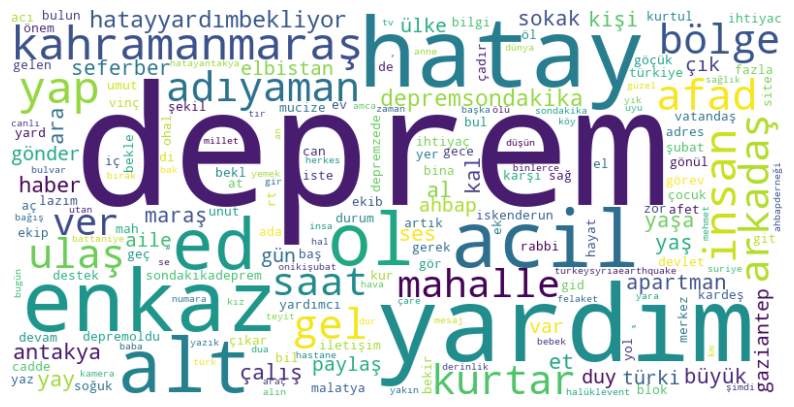

In [78]:
all_words = []
for text in df["content_no_rare_words"]:
    all_words.extend(text)  

word_counts = Counter(all_words)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [79]:
df.head()

,timestamp,username,handle,tweet_date,content,content_ment_link,content_wo_punct,content_wo_removed_english,content_wo_normalize,content_wo_tokenize,content_wo_stop,content_wo_lemmatized,content_no_rare_words
0,2024-11-03 19:38:25,Orhan Şevik,orhan_sevik,"Feb 8, 2023",@haluklevent\n @oguzhanugur\n hepinizden alla...,\n \n hepinizden allah razı olsun iyiki varsı...,hepinizden allah razı olsun iyiki varsını...,hepinizden allah razı olsun iyiki varsınız deprem,hepinizden allah razı olsun iyi ki varsınız de...,"[hepinizden, allah, razı, olsun, iyi, ki, vars...","[hepinizden, razı, varsınız, deprem]","[hep, razı, var, deprem]","[hep, razı, var, deprem]"
1,2024-11-03 19:38:25,nursena,nurssxx_,"Feb 8, 2023",allahım nolur sen onlara dayanma gücü ver #deprem,allahım nolur sen onlara dayanma gücü ver #deprem,allahım nolur sen onlara dayanma gücü ver deprem,allahım nolur onlara dayanma gücü ver deprem,allahım ne olur onlara dayanma gücü ver deprem,"[allahım, ne, olur, onlara, dayanma, gücü, ver...","[onlara, dayanma, gücü, ver, deprem]","[o, dayan, güc, ver, deprem]","[o, dayan, güc, ver, deprem]"
2,2024-11-03 19:38:25,Elif ŞEKER,55ellllllif,"Feb 8, 2023",replying to \n@haluklevent\n @danlabilic\n and...,replying to \n\n \n and \n_harun\nadıyamanda a...,replying to and harun adıyamanda ali taş...,harun adıyamanda ali taşı mahallesi sokak hic...,harun adıyamanda ali taşı mahallesi sokak hicr...,"[harun, adıyamanda, ali, taşı, mahallesi, soka...","[harun, adıyamanda, ali, taşı, mahallesi, soka...","[haru, adıyaman, ali, taşı, mahalle, sokak, hi...","[adıyaman, ali, taşı, mahalle, sokak, apartman..."
3,2024-11-03 19:38:25,Yusuf,yusufaltuns,"Feb 8, 2023",tuğba södekoğlu kovulsun \n@showtv\n #deprem,tuğba södekoğlu kovulsun \n\n #deprem,tuğba södekoğlu kovulsun deprem,tuğba södekoğlu kovulsun deprem,tuğba sodekoğlu kovulsun deprem,"[tuğba, sodekoğlu, kovulsun, deprem]","[tuğba, sodekoğlu, kovulsun, deprem]","[tuğba, sodekoğlu, kov, deprem]",[deprem]
4,2024-11-03 19:38:25,𝐎̈𝐳𝐠𝐮̈𝐫 𝐑𝐚𝐧,dryghtn2,"Feb 8, 2023",arkadaşimiza ulaşamiyoruz\nkahramanmaraş elbis...,arkadaşimiza ulaşamiyoruz\nkahramanmaraş elbis...,arkadaşimiza ulaşamiyoruz kahramanmaraş elbist...,arkadaşimiza ulaşamiyoruz kahramanmaraş elbist...,arkadaşımıza ulaşamıyoruz kahramanmaraş elbist...,"[arkadaşımıza, ulaşamıyoruz, kahramanmaraş, el...","[arkadaşımıza, ulaşamıyoruz, kahramanmaraş, el...","[arkadaş, ulaş, kahramanmaraş, elbistan, pınar...","[arkadaş, ulaş, kahramanmaraş, elbistan, mahal..."


In [81]:
df.to_csv('tweets_cleaned.csv', index=False)